In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Diamond_Prices.csv")
df.head()

,price,carat,cut,color,clarity,table,length,width,depth
0,1053,0.48,Very Good,I,VS1,55.0,4.99,5.03,3.12
1,584,0.34,Premium,D,SI1,58.0,4.43,4.47,2.76
2,9005,1.04,Ideal,F,VVS2,57.0,6.50,6.53,3.99
3,2056,0.70,Premium,G,SI2,61.0,5.66,5.63,3.49
4,9407,1.57,Very Good,H,VS2,56.0,7.46,7.40,4.71


In [3]:
df.shape

(500, 9)

In [4]:
df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
table      0
length     0
width      0
depth      0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(500, 9)

In [7]:
df.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'table', 'length', 'width',
       'depth'],
      dtype='object')

In [9]:
cat_col = ['cut', 'color', 'clarity']
for i in cat_col:
    print(df[i].unique())

['Very Good' 'Premium' 'Ideal' 'Fair' 'Good']
['I' 'D' 'F' 'G' 'H' 'E' 'J']
['VS1' 'SI1' 'VVS2' 'SI2' 'VS2' 'VVS1' 'I1' 'IF']


In [10]:
df.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
table      float64
length     float64
width      float64
depth      float64
dtype: object

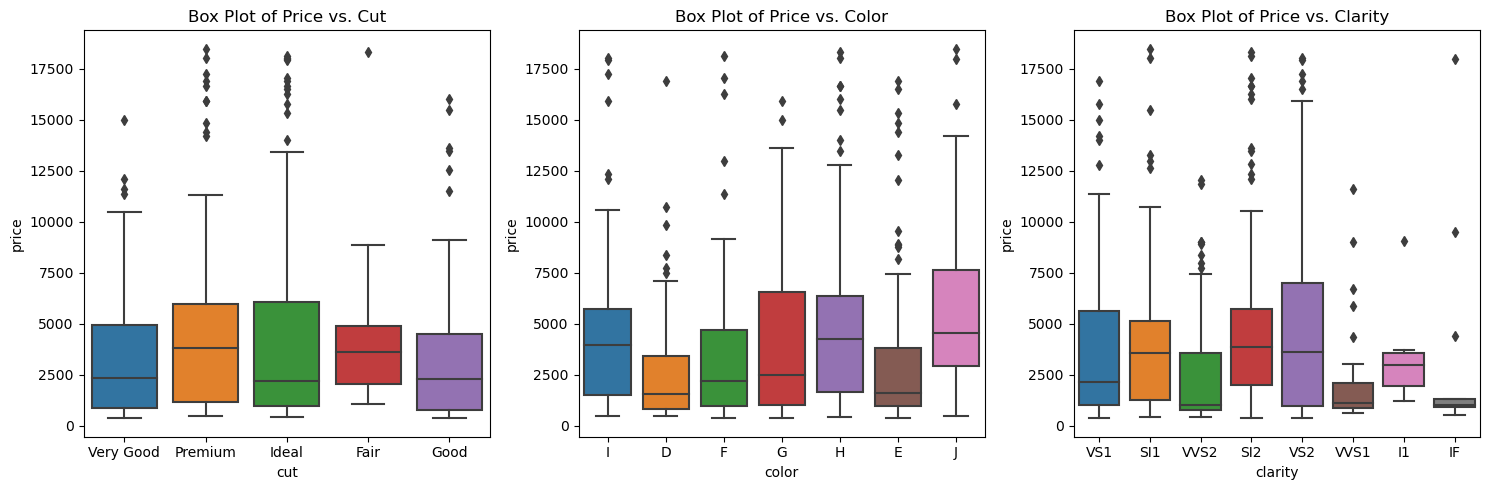

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Box Plot of Price vs. Cut')
plt.subplot(132)
sns.boxplot(x='color', y='price', data=df)
plt.title('Box Plot of Price vs. Color')
plt.subplot(133)
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Box Plot of Price vs. Clarity')
plt.tight_layout()
plt.show()

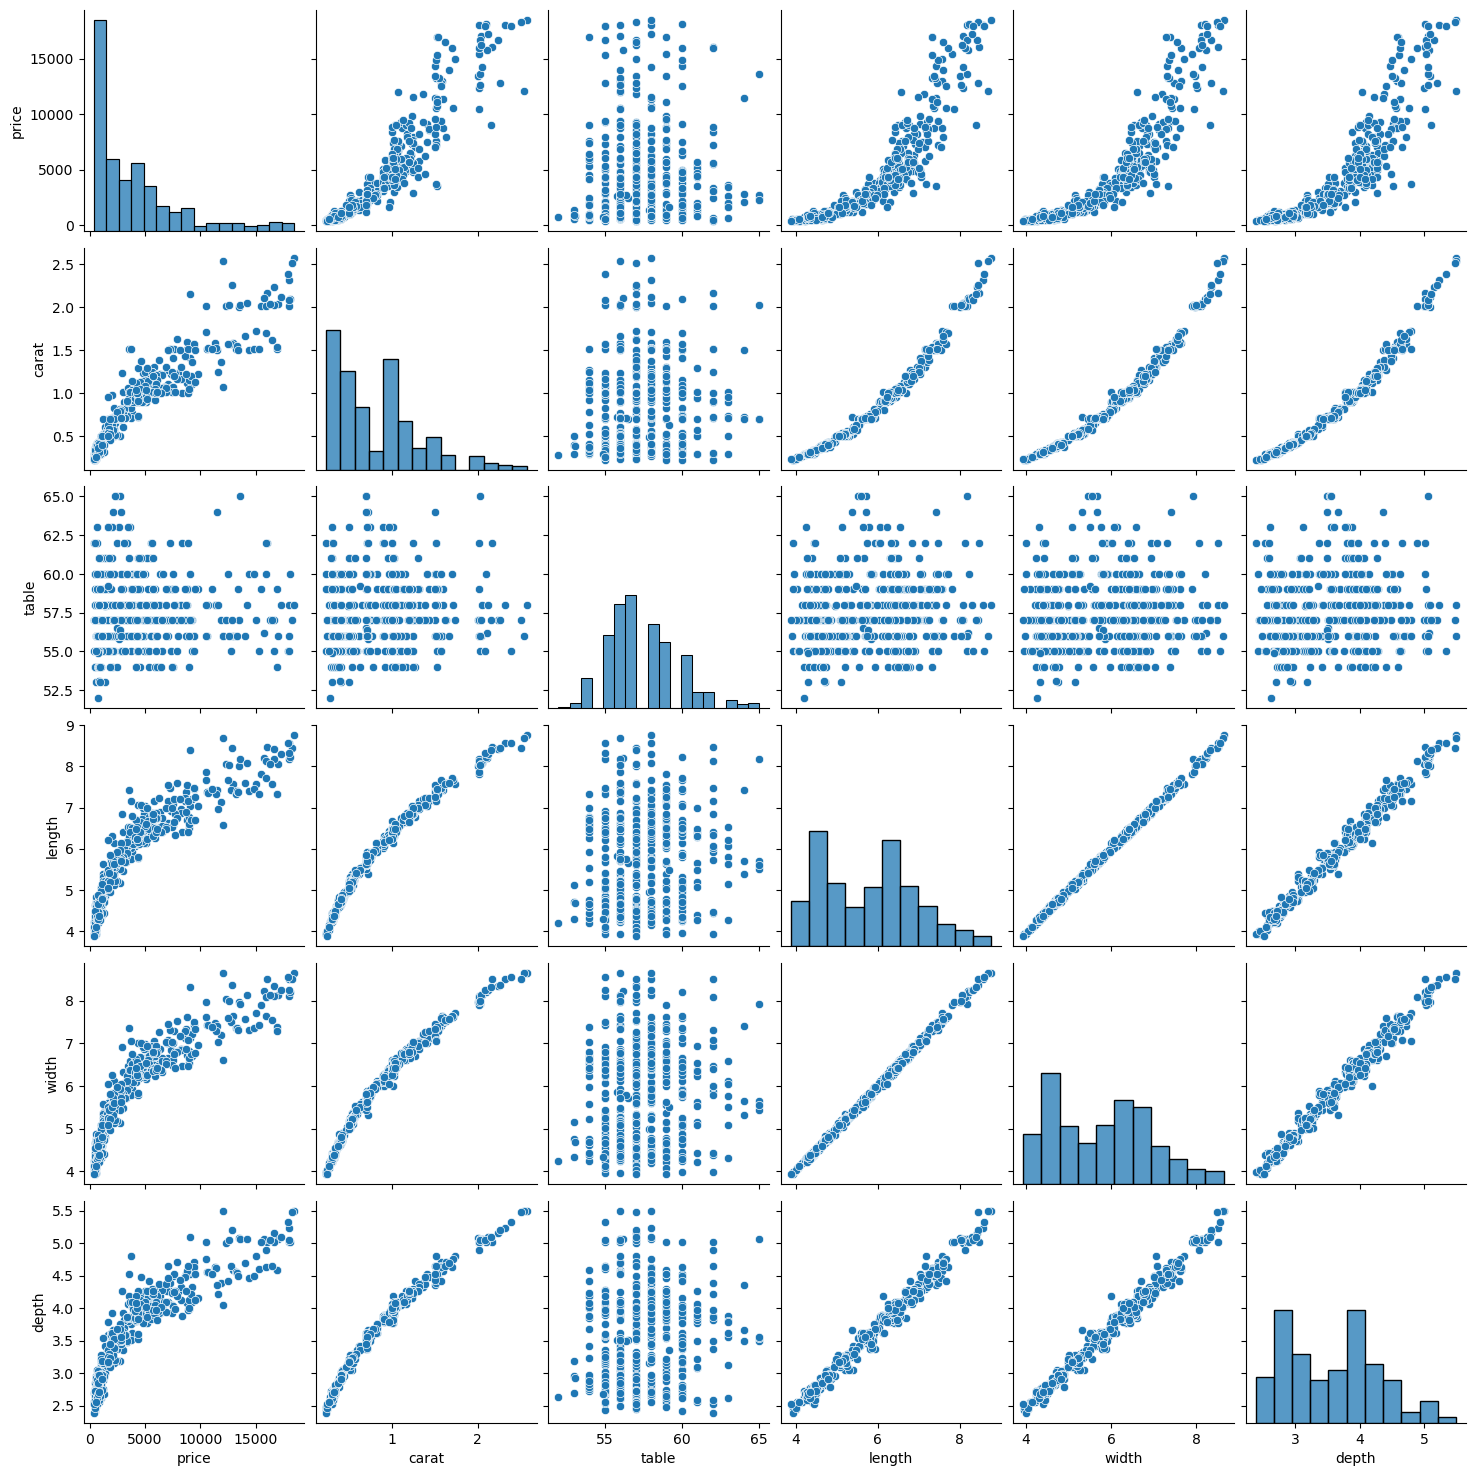

In [93]:
columns_of_interest = ['price', 'carat', 'table', 'length', 'width', 'depth']
sns.pairplot(df[columns_of_interest], kind='scatter')
plt.show()

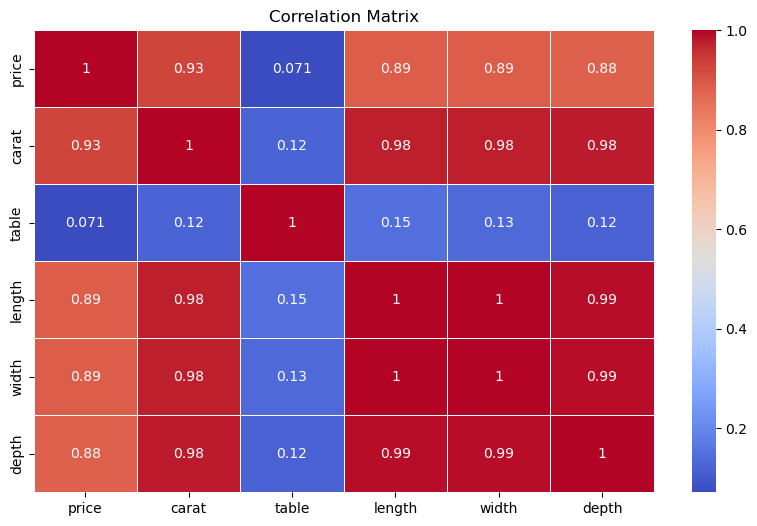

In [94]:
columns_of_interest = ['price', 'carat', 'table', 'length', 'width', 'depth']
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

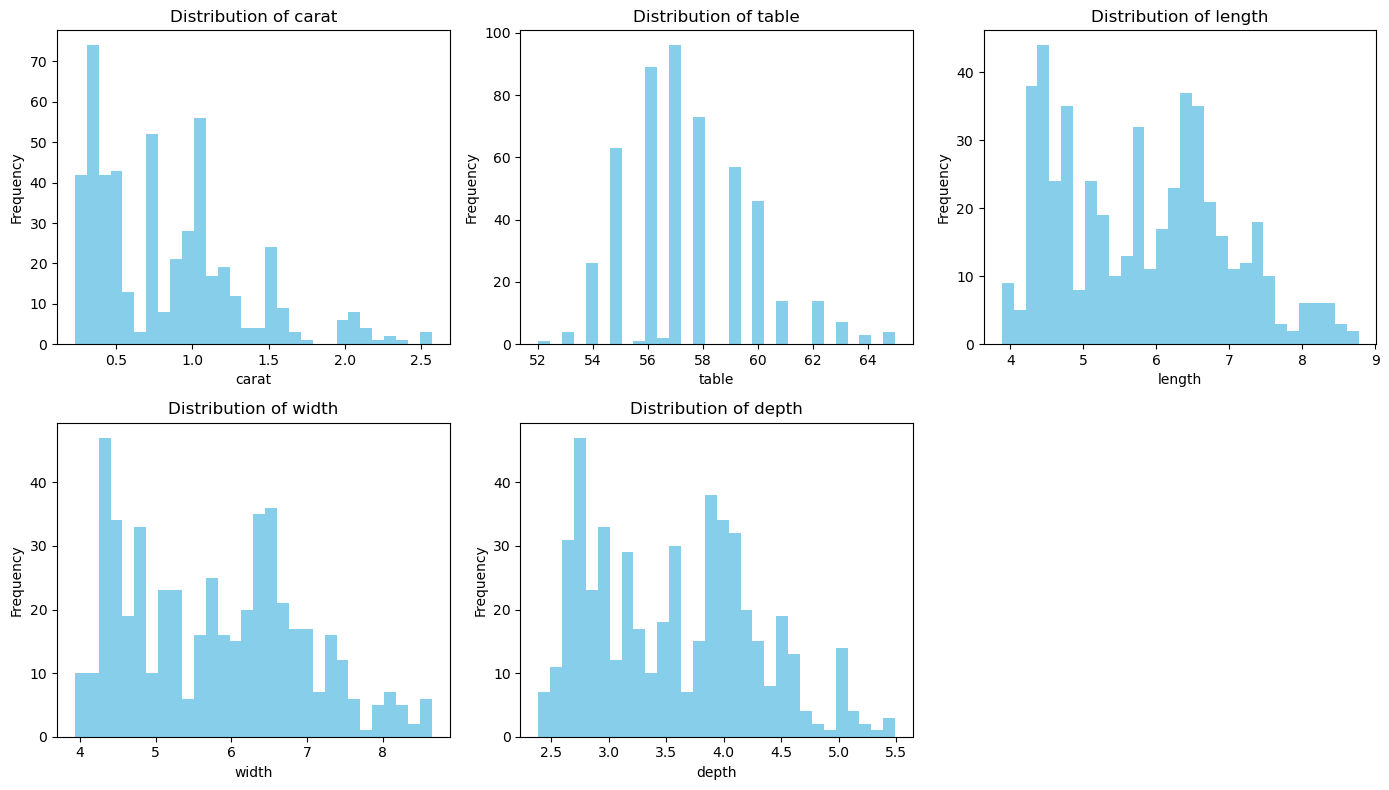

In [96]:
numerical_columns = ['carat', 'table', 'length', 'width', 'depth']
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

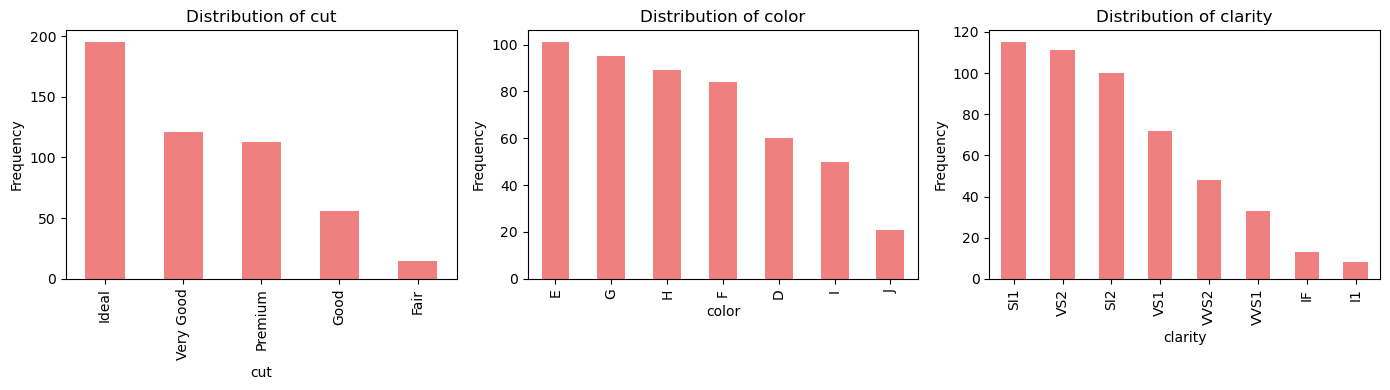

In [98]:
categorical_columns = ['cut', 'color', 'clarity']
plt.figure(figsize=(14, 4))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    df[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [27]:
num_cols = ['price','carat','table', 'length', 'width','depth']
cat_cols = ['cut', 'color', 'clarity']

In [28]:
num_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ('scaler',StandardScaler(with_mean=False))
])
cat_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])

In [29]:
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['price'],axis=1)
y = df['price']

In [35]:
train,test = train_test_split(df,test_size=0.2)

In [36]:
len(train)

400

In [37]:
test

,price,carat,cut,color,clarity,table,length,width,depth
193,450,0.30,Ideal,H,SI1,58.0,4.31,4.33,2.63
56,18026,2.32,Premium,I,SI1,58.0,8.57,8.52,5.23
353,397,0.26,Very Good,G,VS2,57.0,4.09,4.12,2.56
447,4386,0.91,Ideal,H,SI1,56.0,6.17,6.21,3.83
425,16507,1.62,Ideal,E,VS2,57.0,7.58,7.54,4.64
...,...,...,...,...,...,...,...,...,...
304,5637,1.25,Premium,J,VS1,58.0,6.88,6.92,4.29
287,1378,0.50,Very Good,D,VS2,60.0,5.15,5.05,3.17
27,11333,1.59,Premium,H,VS2,58.0,7.42,7.48,4.63
355,1333,0.40,Ideal,E,VVS1,56.0,4.70,4.73,2.95


In [38]:
X_train_arr = preprocessor.fit_transform(train)
X_test_arr = preprocessor.transform(test)

In [48]:
X_test_arr

array([[ 0.1083303 ,  0.61575426, 26.37429245, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.3394709 ,  4.76183297, 26.37429245, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09557139,  0.53365369, 25.91956327, ...,  2.35849713,
         0.        ,  0.        ],
       ...,
       [ 2.72823831,  3.26349759, 26.37429245, ...,  2.35849713,
         0.        ,  0.        ],
       [ 0.32089841,  0.82100568, 25.46483409, ...,  0.        ,
         4.05636957,  0.        ],
       [ 0.50939312,  1.12888282, 25.46483409, ...,  0.        ,
         4.05636957,  0.        ]])

In [49]:
X_train = X_train_arr[:,0:]
y_train = X_train_arr[:,0]
X_test = X_test_arr[:,0:]
y_test = X_test_arr[:,0]

In [50]:
len(X_train),len(y_train),len(X_test),len(y_test)

(400, 400, 100, 100)

In [51]:
y_test

array([0.1083303 , 4.3394709 , 0.09557139, 1.05585928, 3.97379597,
       0.52792964, 3.03758148, 0.17188407, 0.12758901, 0.27443675,
       1.24483546, 1.47040321, 0.09099745, 0.14179232, 0.90275246,
       4.07225617, 0.39071127, 2.36785952, 0.21979013, 0.85316126,
       0.28936226, 0.10712663, 1.83848548, 1.02937854, 1.0127679 ,
       3.42420027, 0.221716  , 1.92250164, 0.10183048, 1.05513708,
       0.14925507, 0.1090525 , 0.86592016, 0.39480374, 0.28430684,
       0.40852558, 0.41478466, 1.16780058, 0.19740187, 4.34524852,
       0.53322579, 1.23737271, 0.23832665, 1.09533965, 0.98147248,
       1.09269158, 0.60472378, 0.27082574, 0.19643894, 0.48194945,
       1.66467554, 0.19306866, 0.16153251, 1.0276934 , 0.31536153,
       0.97786147, 1.60930672, 0.18464297, 0.21545692, 0.49687496,
       1.075118  , 0.32980557, 1.29635254, 3.27903768, 4.00629506,
       1.19500353, 0.24241913, 0.18705031, 0.13288516, 0.15190315,
       1.33631438, 0.63505627, 0.41382173, 0.72196124, 0.19210

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

In [57]:
param_grids = {
    "Linear Regression": {},
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "epsilon": [0.1, 0.2, 0.5]
    }
}

In [61]:
best_models = {}
scores = {}
for model_name,model in models.items():
    gs = GridSearchCV(model,param_grids[model_name],cv=5,n_jobs=-1)
    gs.fit(X_train,y_train)
    best_models[model_name] = gs.best_estimator_
    scores[model_name] = gs.best_score_

In [62]:
best_models

{'Linear Regression': LinearRegression(),
 'K-Nearest Neighbors': KNeighborsRegressor(algorithm='ball_tree', weights='distance'),
 'Random Forest': RandomForestRegressor(max_depth=10),
 'AdaBoost': AdaBoostRegressor(n_estimators=200),
 'Gradient Boosting': GradientBoostingRegressor(),
 'Support Vector Machine': SVR(C=1, kernel='linear')}

In [63]:
scores

{'Linear Regression': 1.0,
 'K-Nearest Neighbors': 0.8116520215651976,
 'Random Forest': 0.999443603999647,
 'AdaBoost': 0.9958711812933903,
 'Gradient Boosting': 0.9997340311478101,
 'Support Vector Machine': 0.9966019326851694}

In [64]:
linear_regression = best_models["Linear Regression"]
knn = best_models["K-Nearest Neighbors"]
random_forest = best_models["Random Forest"]
adaboost = best_models["AdaBoost"]
gradient_boosting = best_models["Gradient Boosting"]
svr = best_models["Support Vector Machine"]

In [70]:
y_pred_lr = linear_regression.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = adaboost.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [74]:
mean_absolute_error(y_test,y_pred_lr),mean_squared_error(y_test,y_pred_lr),r2_score(y_test,y_pred_lr)

(2.5615620735663926e-15, 9.58451362775952e-30, 1.0)

In [75]:
mean_absolute_error(y_test,y_pred_knn),mean_squared_error(y_test,y_pred_knn),r2_score(y_test,y_pred_knn)

(0.28911259550335766, 0.1642315994181678, 0.8513414332829383)

In [76]:
mean_absolute_error(y_test,y_pred_rf),mean_squared_error(y_test,y_pred_rf),r2_score(y_test,y_pred_rf)

(0.006523923007768183, 0.00025663074789432475, 0.9997677039053833)

In [77]:
mean_absolute_error(y_test,y_pred_ab),mean_squared_error(y_test,y_pred_ab),r2_score(y_test,y_pred_ab)

(0.050969218765106336, 0.004094613974410475, 0.996293652093434)

In [78]:
mean_absolute_error(y_test,y_pred_gb),mean_squared_error(y_test,y_pred_gb),r2_score(y_test,y_pred_gb)

(0.006707586213245495, 0.00014727127910823523, 0.9998666935148389)

In [79]:
mean_absolute_error(y_test,y_pred_svr),mean_squared_error(y_test,y_pred_svr),r2_score(y_test,y_pred_svr)

(0.04544040388746815, 0.003136375033466566, 0.9971610273612744)

In [80]:
import pickle
with open("F:\projects\diamondPrice\artifacts\model.pkl", "wb") as file_obj:
            pickle.dump(linear_regression, file_obj)

In [83]:
with open(r"F:\projects\diamondPrice\artifacts\preprocessor.pkl", "wb") as file_ob:
            pickle.dump(preprocessor, file_ob)